<a href="https://colab.research.google.com/github/BiancaBb01/PMP-2024/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coloanele setului de date: Index(['Surface_area', 'Rooms', 'Distance_to_center', 'Price'], dtype='object')
   Surface_area  Rooms  Distance_to_center   Price
0         87.45      3                9.13  247.02
1        145.07      4                2.78  416.78
2        123.20      3                1.88  360.14
3        109.87      1                5.15  303.50
4         65.60      4                9.86  205.48


Output()

Output()

              mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  280.560  0.510  279.610  281.514      0.008    0.005    4511.0   
beta[0]     73.222  0.500   72.319   74.201      0.007    0.005    4887.0   
beta[1]     10.872  0.509    9.926   11.815      0.008    0.005    4282.0   
beta[2]     -8.743  0.505   -9.684   -7.801      0.007    0.005    5960.0   
sigma        4.957  0.299    4.432    5.544      0.004    0.003    4672.0   

           ess_tail  r_hat  
intercept    2733.0    1.0  
beta[0]      3611.0    1.0  
beta[1]      3163.0    1.0  
beta[2]      2960.0    1.0  
sigma        3164.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n1'}>],
       [<Axes: title={'center': 'beta\n2'}>,
        <Axes: title={'center': 'sigma'}>, <Axes: >]], dtype=object)

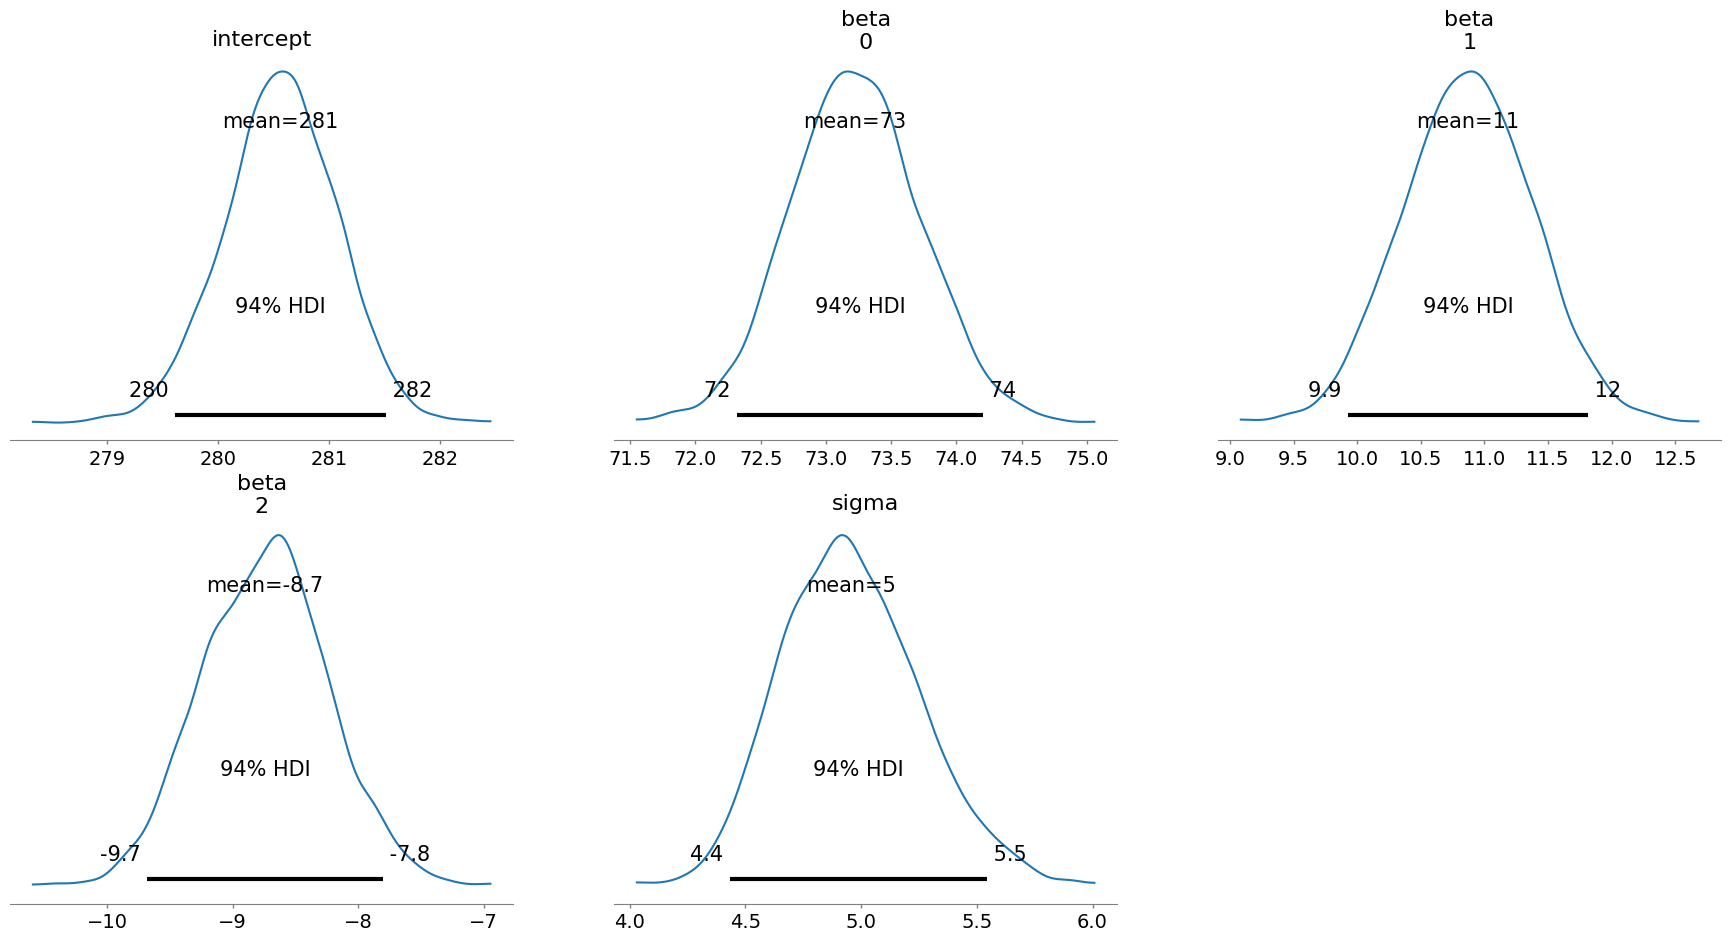

In [7]:

import pandas as pd
import pymc as pm
import arviz as az

file_path = r"/content/sample_data/real_estate_data.csv"  # Inlocuieste cu calea reala a fisierului
data = pd.read_csv(file_path)

print("Coloanele setului de date:", data.columns)
print(data.head())


X_columns = ['Surface_area', 'Rooms', 'Distance_to_center']
y_column = 'Price'

X = data[X_columns]
y = data[y_column]

# Standardizeaza predictorii pentru o performanta mai buna a esantionarii
X_standardized = (X - X.mean()) / X.std()

# Construieste un model de regresie liniara bayesiana
with pm.Model() as model:
    #interceptie si coeficientii de regresie
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_standardized.shape[1])

    #term. eroare (deviatia standard)
    sigma = pm.HalfNormal("sigma", sigma=1)

    #predictiile
    mu = intercept + pm.math.dot(X_standardized, beta)

    # verosimilitatea datelelor
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Esantionarea din distributia posterioara
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, random_seed=42)

# Rezumat din distributia posterioara
summary = az.summary(trace, var_names=["intercept", "beta", "sigma"])
print(summary)


az.plot_posterior(trace, var_names=["intercept", "beta", "sigma"])
